Import necessary library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np


Read Train and test CSV

In [10]:
loan = pd.read_csv('train_ctrUa4K.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
print('Number of Rows: ',loan.shape[0])
print('Number of columns:',loan.shape[1])

Number of Rows:  614
Number of columns: 13


In [11]:
loanTest = pd.read_csv('test_lAUu6dG.csv')
loanTest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [15]:
print('Number of Rows: ',loanTest.shape[0])
print('Number of columns:',loanTest.shape[1])

Number of Rows:  367
Number of columns: 12


Here Concat train test data to perform EDA on it

In [4]:
loan['type'] = 'train'
loanTest['type'] = 'test'

In [5]:
data = pd.concat([loan,loanTest],ignore_index=True)

C:\Users\sam\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Display first five row to understand data

In [7]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,type
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [16]:
print('Number of Rows: ',data.shape[0])
print('Number of columns:',data.shape[1])

Number of Rows:  981
Number of columns: 14


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
type                 981 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 107.4+ KB


### Observation  
As per data following columns contains null values Gender,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Married and Self_Employed. Most of columns are categoricals so need to convert into numeric using encoding techniques.

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


### Observation:
In above given data most of columns contains outliers  

###  Data cleaning and processsing:

In [20]:
mode=data.Gender.mode()
data['Gender']=data['Gender'].replace(np.nan,'Male')
mode=data.Married.mode()

In [21]:
data['Married']=data['Married'].replace(np.nan,'Yes')
data['Gender'].isnull().sum()

0

In [22]:
data.Dependents.unique()
data.Dependents=data.Dependents.str.extract('(\d+)')


In [23]:
data['Dependents']=data['Dependents'].replace(np.nan,data.Dependents.median())

In [24]:
data['Self_Employed']=data['Self_Employed'].replace(np.nan,'No')
data['Self_Employed'].isnull().sum()

0

In [25]:
data.LoanAmount.unique()

data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.median())

In [26]:
data.Credit_History = data.Credit_History.fillna(1)
data.Credit_History.isnull().sum()

0

In [27]:
data.Dependents = data.Dependents.astype(float)
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median())

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 14 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null float64
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
type                 981 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 107.4+ KB


In [29]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
type                   0
dtype: int64

### Observation:

After cleaning data we can see that now data does not contain null values

C:\Users\sam\Anaconda5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


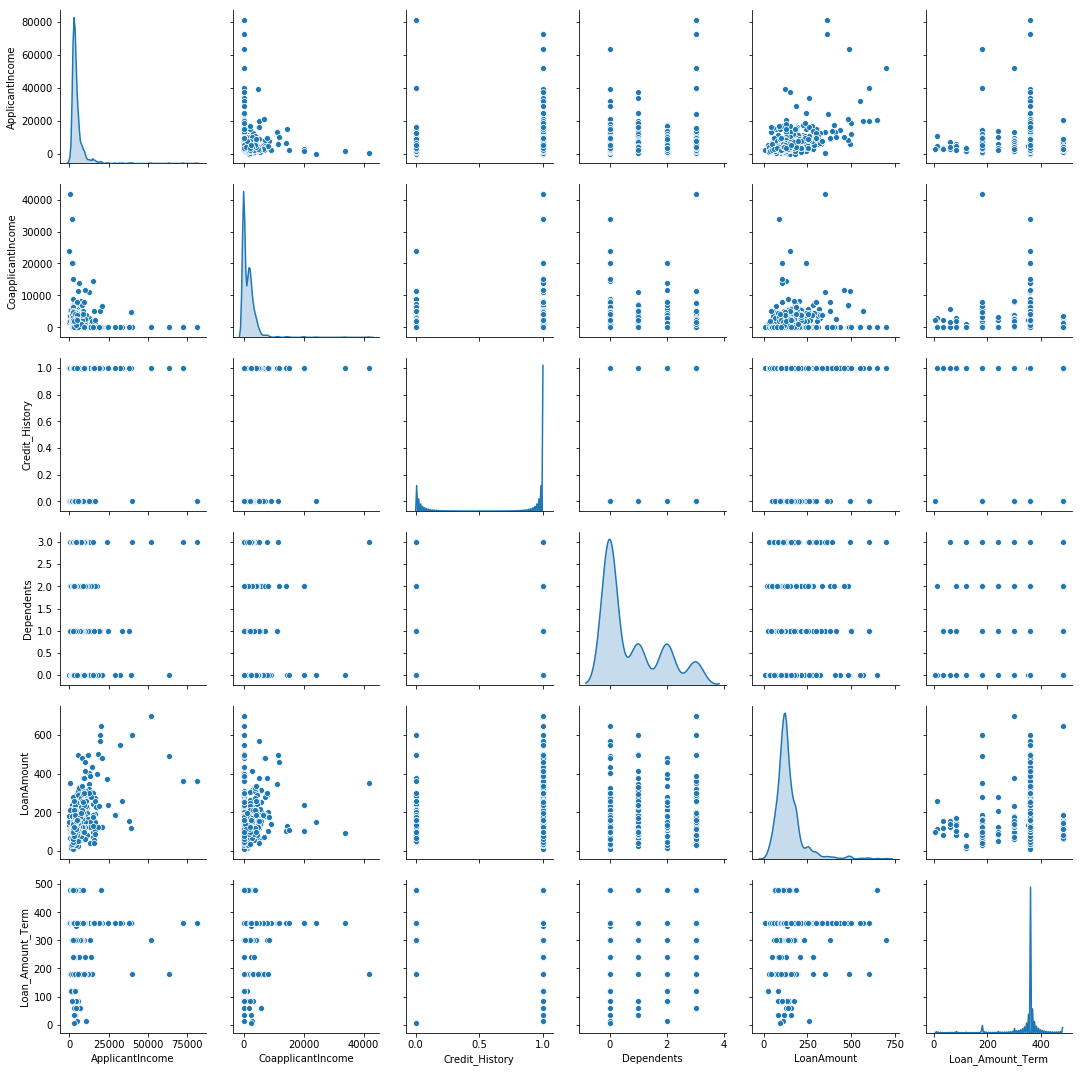

In [30]:
sns.pairplot(data, diag_kind='kde')

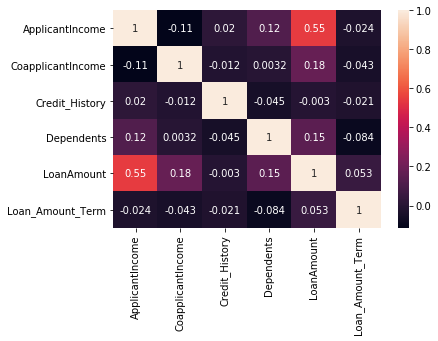

In [31]:
sns.heatmap(data.corr(),annot=True)

### observation: 
Here we can see the distribution of data in pair plot LoanAmount column data is rightly skewed and have high pick and in heat map we can see less correlation present in data

In [32]:
Dumdata = pd.get_dummies(data,columns=['Education','Gender','Married','Property_Area','Self_Employed'])
Dumdata.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,type,Education_Graduate,Education_Not Graduate,Gender_Female,Gender_Male,Married_No,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_No,Self_Employed_Yes
0,5849,0.0,1.0,0.0,126.0,360.0,LP001002,Y,train,1,0,0,1,1,0,0,0,1,1,0
1,4583,1508.0,1.0,1.0,128.0,360.0,LP001003,N,train,1,0,0,1,0,1,1,0,0,1,0
2,3000,0.0,1.0,0.0,66.0,360.0,LP001005,Y,train,1,0,0,1,0,1,0,0,1,0,1
3,2583,2358.0,1.0,0.0,120.0,360.0,LP001006,Y,train,0,1,0,1,0,1,0,0,1,1,0
4,6000,0.0,1.0,0.0,141.0,360.0,LP001008,Y,train,1,0,0,1,1,0,0,0,1,1,0


In [33]:
data1 = Dumdata.drop(['Education_Not Graduate','Gender_Female','Married_No','Self_Employed_No'],axis=1)

In [35]:
print('Number of Rows: ',data1.shape[0])
print('Number of columns:',data1.shape[1])

Number of Rows:  981
Number of columns: 16


C:\Users\sam\Anaconda5\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


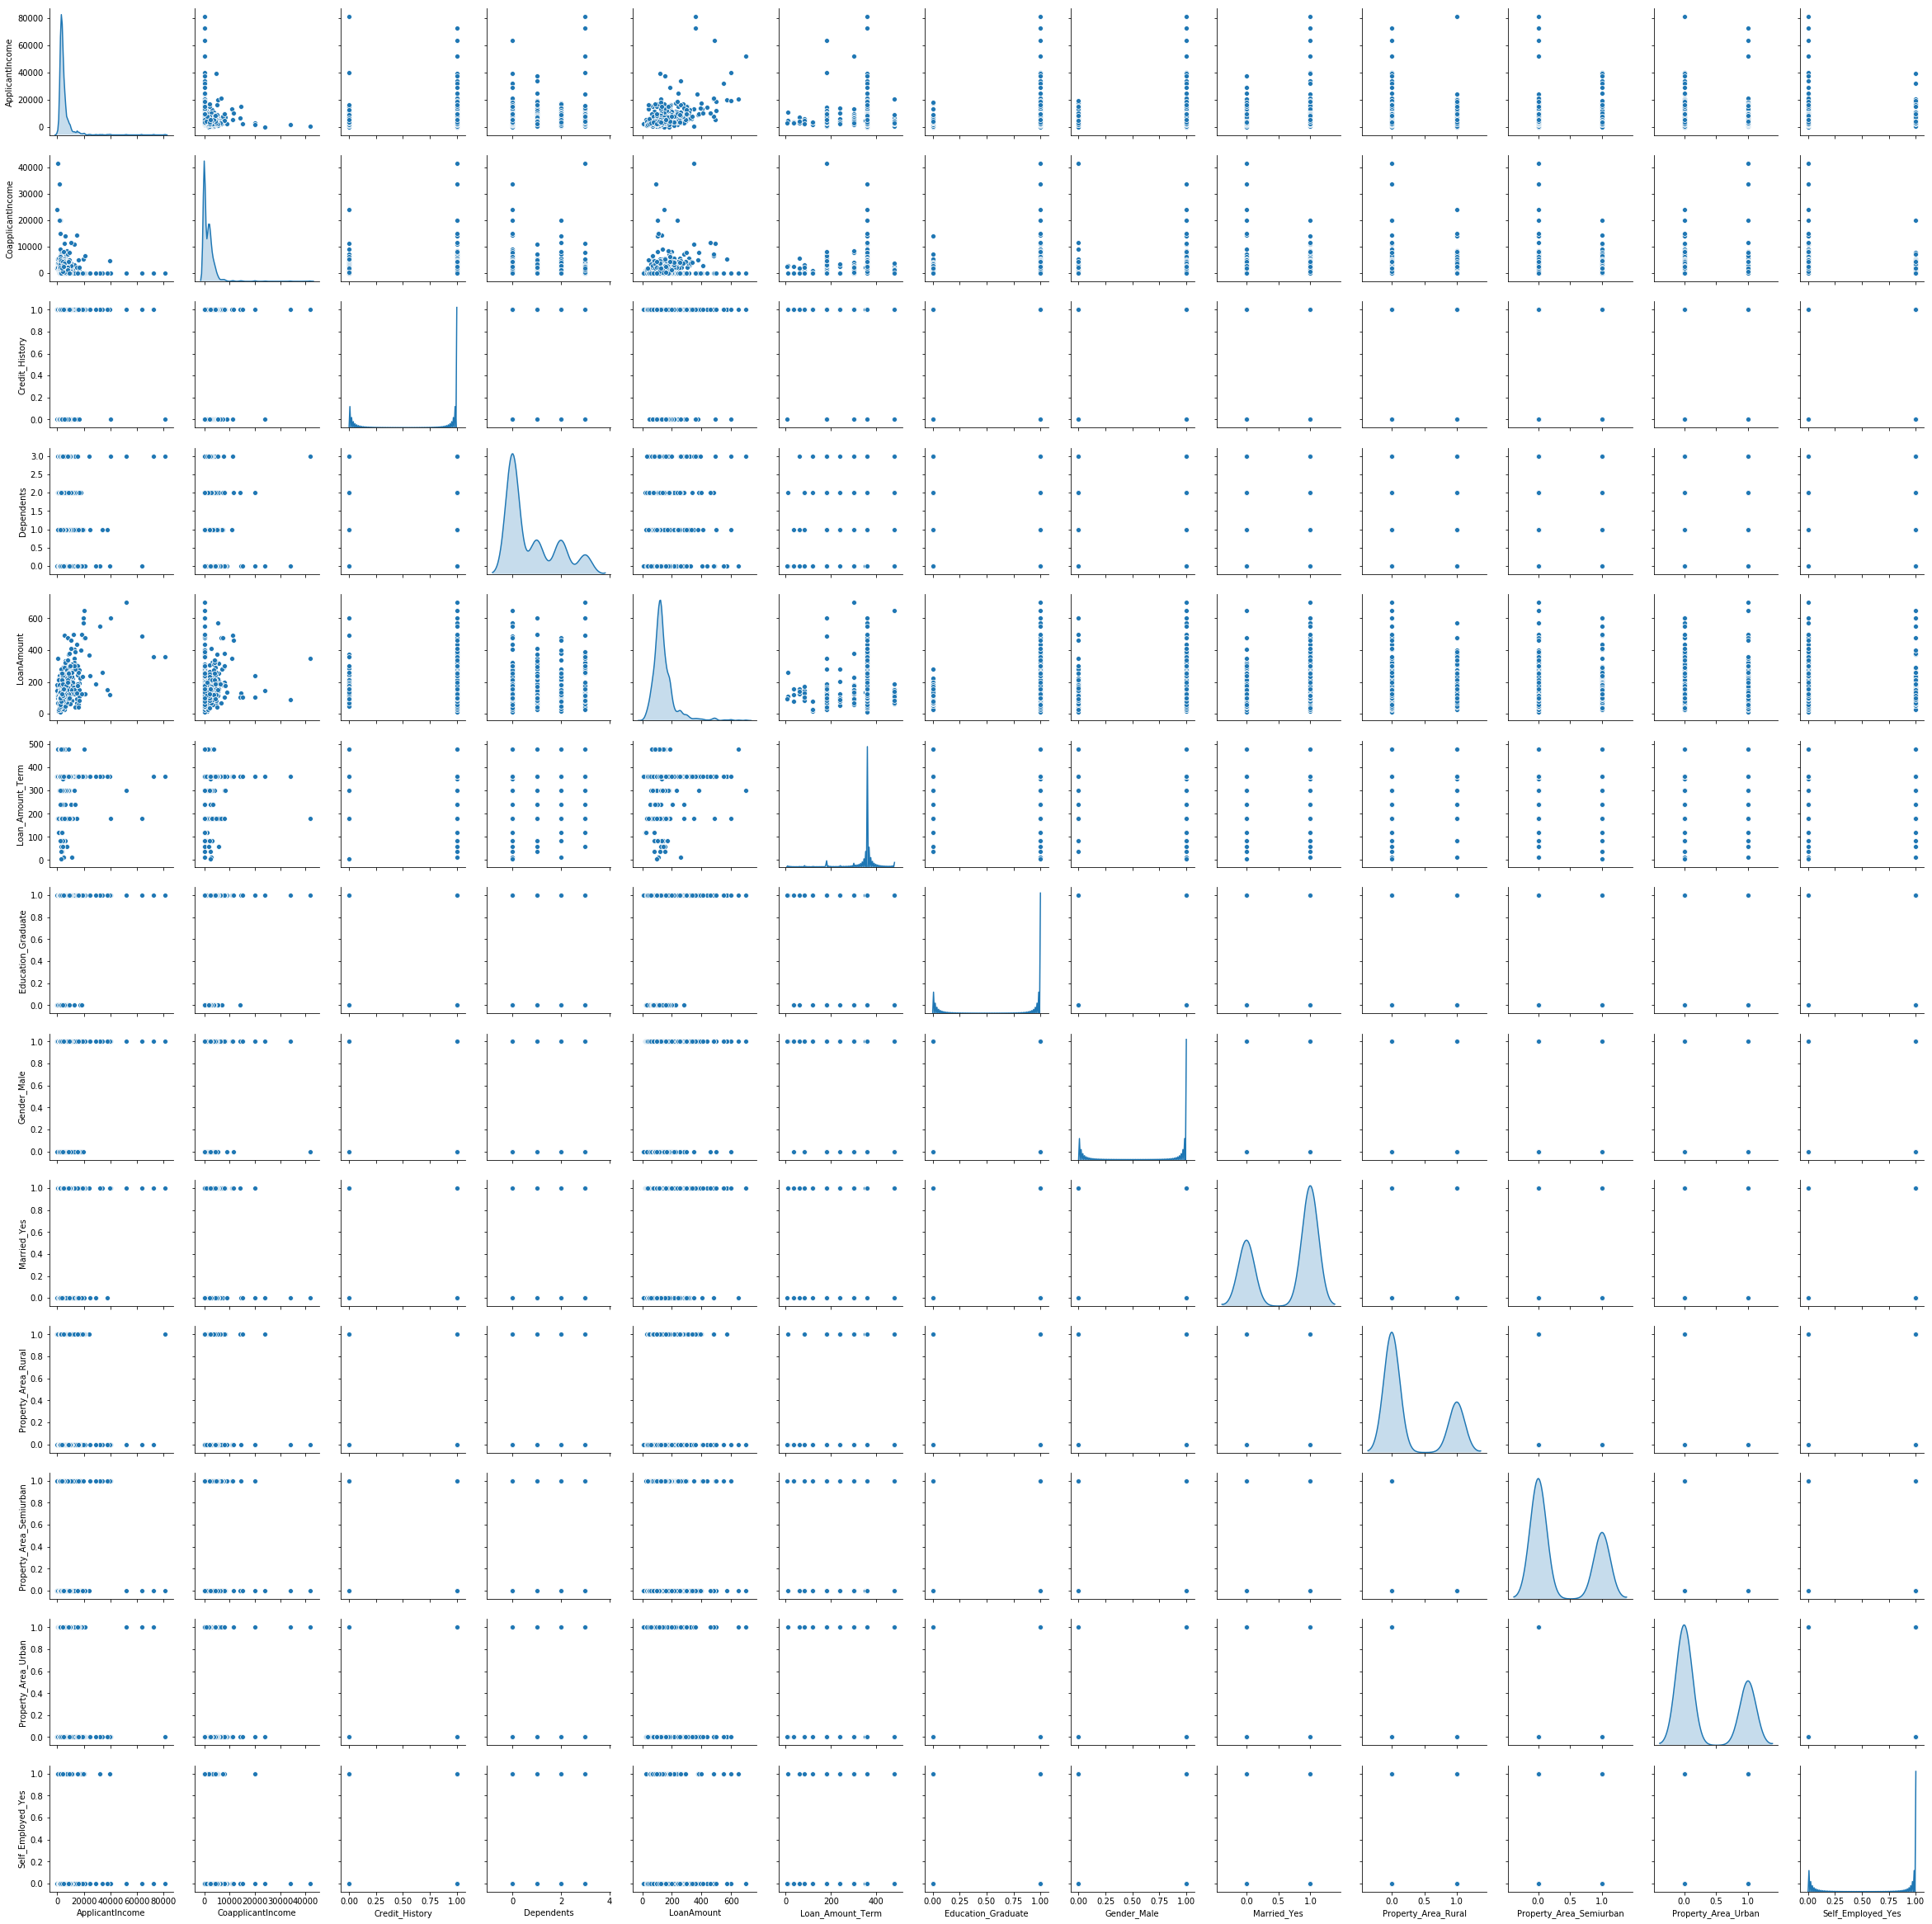

In [36]:
sns.pairplot(data1, diag_kind='kde')

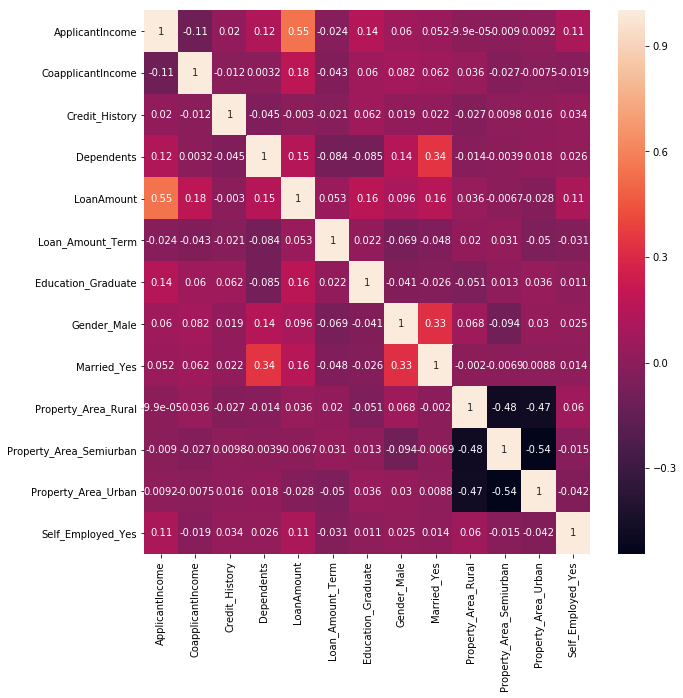

In [40]:
from IPython.core.pylabtools import figsize

figsize(10,10)
sns.heatmap(data1.corr(),annot=True)

In [48]:
#data1.Loan_Status

In [ ]:
# data['Loan_Status'] =data['Loan_Status'].astype(str)
# # data.Loan_Status = data.replace(to_replace='Y',value=1)
# # data.Loan_Status = data.replace(to_replace='N',value=0)
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# data['Loan_Status'] = data['Loan_Status'].apply(le.fit_transform)

In [41]:
train = data1.loc[data1.type=='train']
test = data1.loc[data1.type=='test']

In [42]:
test.shape

(367, 16)

In [43]:
train1 = train.drop(['Loan_ID','type','Loan_Status'],axis=1)

test1 =  test.drop(['Loan_ID','Loan_Status','type'],axis=1)

In [44]:
train1.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Education_Graduate,Gender_Male,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,5849,0.0,1.0,0.0,126.0,360.0,1,1,0,0,0,1,0
1,4583,1508.0,1.0,1.0,128.0,360.0,1,1,1,1,0,0,0
2,3000,0.0,1.0,0.0,66.0,360.0,1,1,1,0,0,1,1
3,2583,2358.0,1.0,0.0,120.0,360.0,0,1,1,0,0,1,0
4,6000,0.0,1.0,0.0,141.0,360.0,1,1,0,0,0,1,0


In [45]:
test1.shape

(367, 13)

In [46]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# strain = pd.DataFrame(ss.fit_transform(train1),columns=train1.columns)
# stest = pd.DataFrame(ss.fit_transform(test1),columns=test1.columns)

In [47]:
train1.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Education_Graduate,Gender_Male,Married_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,5849,0.0,1.0,0.0,126.0,360.0,1,1,0,0,0,1,0
1,4583,1508.0,1.0,1.0,128.0,360.0,1,1,1,1,0,0,0
2,3000,0.0,1.0,0.0,66.0,360.0,1,1,1,0,0,1,1
3,2583,2358.0,1.0,0.0,120.0,360.0,0,1,1,0,0,1,0
4,6000,0.0,1.0,0.0,141.0,360.0,1,1,0,0,0,1,0


In [66]:
xTrain = train1

xtest = test1

In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ytrain = pd.DataFrame()
ytrain['Loan_Status'] =  train.Loan_Status
ytrain =  ytrain.apply(le.fit_transform)
# ytrain = train.Loan_Status
yTrain = ytrain['Loan_Status']


In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xTrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [69]:
pred = knn.predict(xtest)
pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [70]:
from sklearn.model_selection import train_test_split


In [71]:
xtrain, xtest,ytrain,ytest =train_test_split(xTrain,yTrain,test_size=0.4,random_state=0)

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [73]:
lr.fit(xtrain,ytrain)

C:\Users\sam\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred = lr.predict(xtest)

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.48      0.63        75
           1       0.81      0.98      0.89       171

    accuracy                           0.83       246
   macro avg       0.86      0.73      0.76       246
weighted avg       0.84      0.83      0.81       246



In [78]:
confusion_matrix(ytest, y_pred)

array([[ 36,  39],
       [  4, 167]], dtype=int64)

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
pred = knn.predict(xtest)

In [80]:
print(classification_report(ytest,pred))


              precision    recall  f1-score   support

           0       0.30      0.20      0.24        75
           1       0.69      0.80      0.74       171

    accuracy                           0.61       246
   macro avg       0.50      0.50      0.49       246
weighted avg       0.57      0.61      0.59       246



In [81]:
confusion_matrix(ytest, pred)

array([[ 15,  60],
       [ 35, 136]], dtype=int64)

### Lets check the model 

C:\Users\sam\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

LR: 0.796171 (0.064426)
LDA: 0.796171 (0.064426)
KNN: 0.646547 (0.066339)
CART: 0.668619 (0.071147)
NB: 0.771922 (0.062504)


C:\Users\sam\Anaconda5\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The 

SVM: 0.681682 (0.055633)
GBC: 0.771772 (0.090681)


C:\Users\sam\Anaconda5\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\sam\Anaconda5\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

RFC: 0.725300 (0.074291)
Extra Tree: 0.690390 (0.078834)
AdaBoost: 0.768919 (0.075100)
XGBoost: 0.777177 (0.062580)


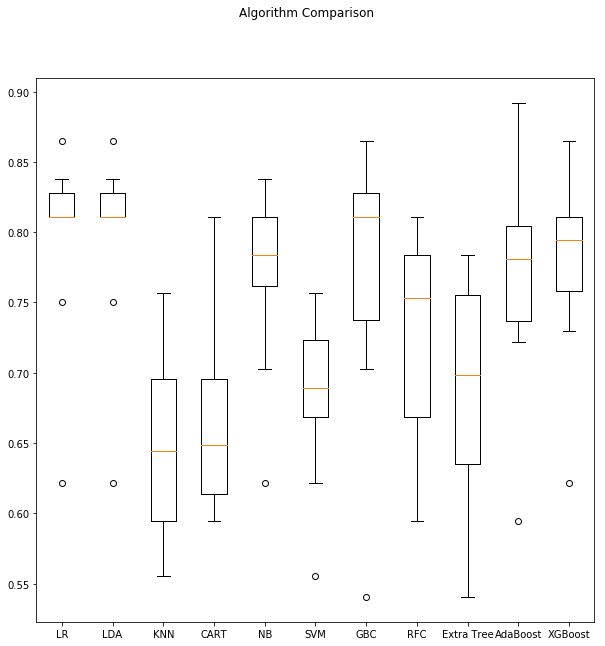

In [92]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
# prepare configuration for cross validation test harness
seed = 7
# prepare models'
msg2 = []
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('Extra Tree', ExtraTreeClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('XGBoost', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, xtrain, ytrain, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    msg2.append( cv_results.mean())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Observation:

Here we can see that ***Logistic Regression and LDA*** performed very well so we can build final model using this two alorithm

In [93]:
loan_status = pd.DataFrame()
loan_status['Loan_ID']  =loanTest['Loan_ID']


loan_status['Loan_Status'] = pd.DataFrame(pred)
loan_status['Loan_Status'] =loan_status['Loan_Status'].astype(str)
loan_status['Loan_Status'] =loan_status['Loan_Status'].replace(to_replace='1',value='Y')
loan_status['Loan_Status'] =loan_status['Loan_Status'].replace(to_replace='0',value='N')

In [94]:
loan_status.head()

,Loan_ID,Loan_Status
0,LP001015,1.0
1,LP001022,1.0
2,LP001031,1.0
3,LP001035,1.0
4,LP001051,1.0


In [78]:
export_csv = loan_status.to_csv(r'C:\Users\sam\Desktop\Great Lakes\My Learnig\Load prediction\FinalPred1.csv'
                               ,index=None,header=True)

In [99]:
final = pd.DataFrame({'All Classification models':msg2},index=['Logistic Regression',
                                                               'Linear Discriminant Analysis','K-Neighbors Classifier',
                                                               'CART','GaussianNB','SVM','GradientBoostingClassifier',
                                                              'RandomForestClassifier','Extra Tree','AdaBoostClassifier','XGBoost'])
final

,All Classification models
Logistic Regression,0.796171
Linear Discriminant Analysis,0.796171
K-Neighbors Classifier,0.646547
CART,0.668619
GaussianNB,0.771922
SVM,0.681682
GradientBoostingClassifier,0.771772
RandomForestClassifier,0.725300
Extra Tree,0.690390
AdaBoostClassifier,0.768919


### Observation:

Here we can see that ***Logistic Regression and LDA*** performed very well so we can build final model using this two alorithm